**Hierarchical clustering*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BASE_COLORS
import seaborn as sns

import scipy.cluster.hierarchy as sch
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

plt.style.use('seaborn')

# Loading data

In [2]:
data = pd.read_csv("./data.dat", sep=';')
X = data.to_numpy()
display(data)
print(X)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
333,3,3,3,3,3,3,5,5,3,3,3
334,3,3,3,3,3,3,5,5,3,3,3
335,3,3,3,3,3,3,5,5,3,3,3
336,3,3,3,3,3,3,5,5,3,3,3


[[4 5 5 ... 3 3 3]
 [5 4 5 ... 3 3 3]
 [5 5 4 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]


# Analyzing data

## dendrogram

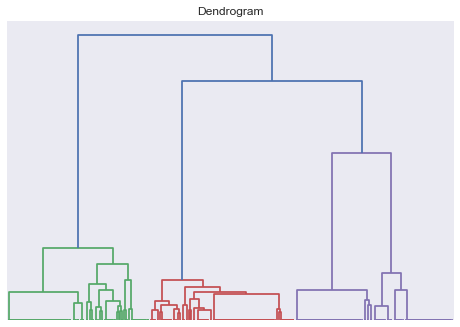

In [3]:
dendrogram_ = sch.dendrogram(sch.linkage(data, method='ward'))
plt.title('Dendrogram')
plt.xticks([])
plt.yticks([])
plt.show()

## lower-dimensional space

In [4]:
X_embedded = TSNE(n_components=2, init='random').fit_transform(X)
print(X_embedded.shape)

(338, 2)


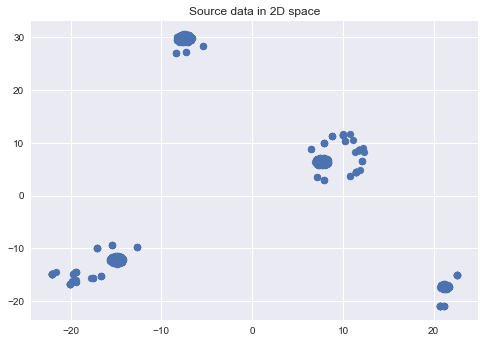

In [5]:
plt.scatter(X_embedded[:,0], X_embedded[:,1])
plt.title('Source data in 2D space')
plt.show()

# Clustering data

In [6]:
N_CLUSTERS = 4

In [7]:
labels = AgglomerativeClustering(n_clusters=N_CLUSTERS).fit_predict(X)
colors = [list(BASE_COLORS.keys())[i] for i in labels]

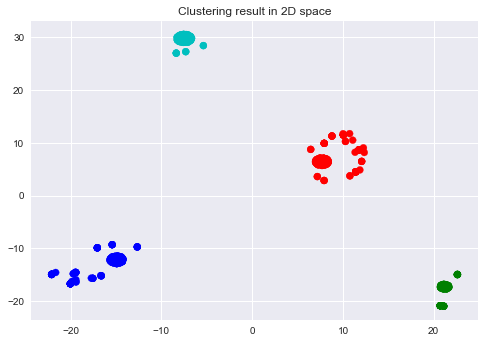

In [8]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=colors)
plt.title('Clustering result in 2D space')
plt.show()

# Interpreting results

Полученные результаты показывают явное разделение опрашиваемых на **4 группы**: 
- **Группа 0:** *Потребляют леденцы для улучшения самочувствия*
- **Группа 1:** *Потребляют леденцы как сладости*
- **Группа 2:** *Потребляют леденцы для свежести полости рта*
- **Группа 3:** *Потребляют леденцы для концентрации внимания*

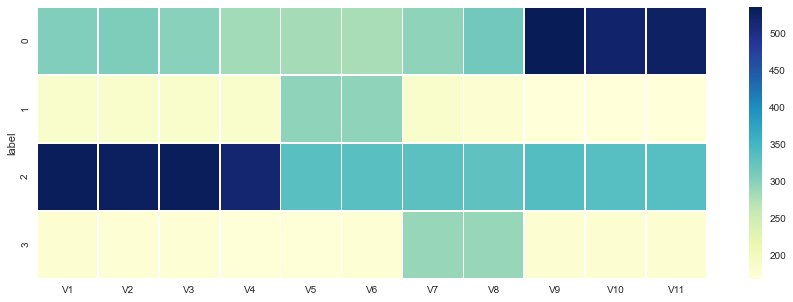

In [10]:
data["label"] = labels

plt.figure(figsize=(15, 5))
sns.heatmap(data.groupby("label").sum(), linewidths=.5, cmap="YlGnBu")
plt.show()

In [11]:
N_EXAMPLES = 3

for label in set(labels):
    indexes = np.random.choice(np.argwhere(labels == label).flatten(), N_EXAMPLES)
    print(f"sample elements of label {label}:")
    display(data.iloc[indexes])
    print("------------------------------------\n\n")

sample elements of label 0:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,label
179,3,3,3,3,3,3,3,3,5,4,4,0
170,3,2,2,2,3,3,4,4,5,5,5,0
165,3,3,3,3,3,3,3,3,5,5,5,0


------------------------------------


sample elements of label 1:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,label
222,3,3,3,3,5,5,3,2,2,2,2,1
256,3,3,3,3,5,5,3,3,3,3,3,1
229,3,3,3,3,5,5,3,3,3,3,3,1


------------------------------------


sample elements of label 2:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,label
80,5,5,5,4,4,4,3,3,4,4,4,2
18,5,5,5,4,3,3,3,3,3,3,3,2
32,4,5,5,5,3,3,3,3,3,3,3,2


------------------------------------


sample elements of label 3:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,label
303,3,3,3,3,3,3,5,5,3,3,3,3
294,3,3,3,3,3,3,5,5,3,3,3,3
297,3,3,3,3,3,3,5,5,3,3,3,3


------------------------------------


